<a href="https://colab.research.google.com/github/jaya-shankar/n_queens/blob/master/N_queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import time
import matplotlib.pyplot as plt

In [ ]:
for s in range(4,12):
  size = s
  # print_solutions = input('Do you want the solutions to be printed (Y/N): ').lower() == 'y'
  print_solutions = False
  n_queens = NQueens(size)
  runInParallel(n_queens.solve_dfs(), n_queens.solve_bfs())

4
0.004818
0.002334
5
0.010139
0.073020
6
0.381220
0.959187
7
3.197633
8.268026
8
58.957321
305.363011



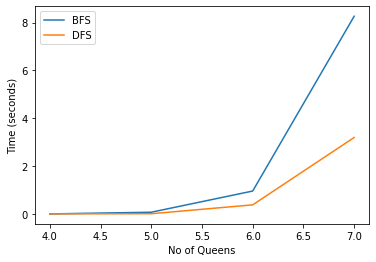

In [12]:
bfs = [0.002334,0.073020,0.9591877,8.268026]
dfs = [0.004818,0.010139,0.381220,3.197633]
x = [4,5,6,7]
plt.plot(x,bfs)
plt.plot(x,dfs)
plt.legend(['BFS', 'DFS'])
plt.xlabel('No of Queens')
plt.ylabel('Time (seconds)')
plt.show()

In [ ]:
def runInParallel(*fns):
  proc = []
  for fn in fns:
    p = Process(target=fn)
    p.start()
    proc.append(p)
  for p in proc:
    p.join()

In [ ]:
from queue import Queue


class NQueens:

    Bfs_points = []
    Dfs_points = []
    Sizes = []
    def __init__(self, size):
      self.Sizes.append(size)
      self.size = size

    def solve_dfs(self):
        time_start = time.time()
        if self.size < 1:
            return 0

        solutions = []
        stack = [[]]
        while stack:
            solution = stack.pop()
            if self.conflict(solution):
                continue
            row = len(solution)
            if row == self.size:
                solutions.append(solution)
                continue
            for col in range(self.size):
                queen = (row, col)
                queens = solution.copy()
                queens.append(queen)
                stack.append(queens)
        time_end = time.time()
        total_dfs_time = time_end - time_start
        print("Size of board: %d" % self.size)  
        print('Total time taken for DFS solutions: %f' % total_dfs_time)
        self.Dfs_points.append( total_dfs_time)
        # return time_end - time_start

    def solve_bfs(self):
        time_start = time.time()
        if self.size < 1:
            return 0
        solutions = []
        queue = Queue()
        queue.put([])
        while not queue.empty():
            solution = queue.get()
            if self.conflict(solution):
                continue
            row = len(solution)
            if row == self.size:
                solutions.append(solution)
                continue
            for col in range(self.size):
                queen = (row, col)
                queens = solution.copy()
                queens.append(queen)
                queue.put(queens)
        time_end = time.time()
        total_bfs_time = time_end - time_start
        print("Size of board: %d" % self.size)  
        print('Total time taken for BFS solutions: %f' % total_bfs_time)
        self.Bfs_points.append(total_bfs_time)
        # return time_end - time_start

    def conflict(self, queens):
        for i in range(1, len(queens)):
            for j in range(0, i):
                a, b = queens[i]
                c, d = queens[j]
                if a == c or b == d or abs(a - c) == abs(b - d):
                    return True
        return False

    def print(self, queens):
        for i in range(self.size):
            print(' ---' * self.size)
            for j in range(self.size):
                p = 'Q' if (i, j) in queens else ' '
                print('| %s ' % p, end='')
            print('|')
        print(' ---' * self.size)
